## Load the Supernova Ia Dataset

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
df = pd.read_csv('supernova_data.csv')
df.head()

,supernova_name,redshift,distance_modulus
0,SN001,0.030379,35.683728
1,SN002,0.044045,36.405286
2,SN003,0.055986,36.883162
3,SN004,0.067503,37.261559
4,SN005,0.074401,37.296234


## Plot Redshift vs Distance Modulus

In [6]:
print(df.columns)

Index(['supernova_name', 'redshift', 'distance_modulus'], dtype='object')


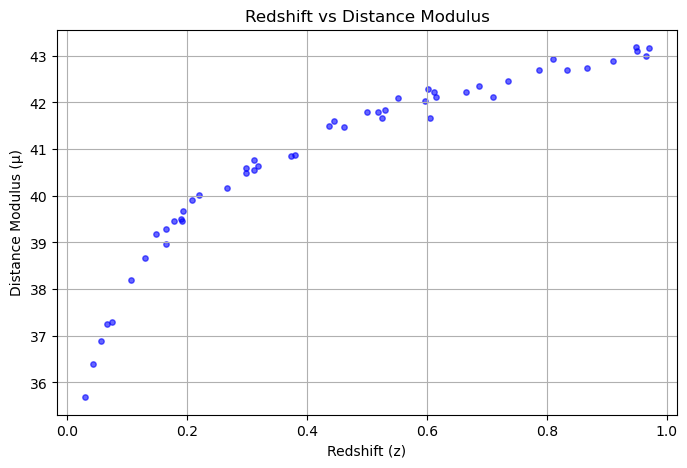

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df['redshift'], df['distance_modulus'], color='blue', alpha=0.6, s=15)
plt.xlabel("Redshift (z)")
plt.ylabel("Distance Modulus (μ)")
plt.title("Redshift vs Distance Modulus")
plt.grid(True)
plt.show()


## Fit a Line to Estimate the Hubble Parameter (H₀)

In [12]:
import numpy as np
from scipy.optimize import curve_fit

df = df.rename(columns={
    'redshift': 'z',
    'distance_modulus': 'mu'
})

# Define Hubble law fit (for low z)
def distance_modulus(z, H0):
    c = 3e5  # speed of light in km/s
    d_l = (c * z) / H0
    mu = 5 * np.log10(d_l) + 25
    return mu

# Filter for low-z (z < 0.1 for reliable linearity)
low_z = df[df['z'] < 0.1]

z_vals = low_z['z'].values
mu_vals = low_z['mu'].values

# Fit curve to get H0
popt, _ = curve_fit(distance_modulus, z_vals, mu_vals)
H0_est = popt[0]
print(f"Estimated Hubble Constant H₀: {H0_est:.2f} km/s/Mpc")


Estimated Hubble Constant H₀: 70.96 km/s/Mpc


## Estimate Age of the Universe

In [13]:
# Estimate age using simplified formula
H0 = H0_est
H0_SI = H0 / (3.086e19)
age_sec = 1 / H0_SI
age_yrs = age_sec / (60*60*24*365.25)

print(f"Estimated Age of the Universe: {age_yrs / 1e9:.2f} billion years")


Estimated Age of the Universe: 13.78 billion years


## Low-z vs High-z Comparison

In [14]:
# Fit separately for low-z and high-z
high_z = df[df['z'] >= 0.1]

def get_H0(subset):
    z = subset['z'].values
    mu = subset['mu'].values
    popt, _ = curve_fit(distance_modulus, z, mu)
    return popt[0]

H0_low = get_H0(low_z)
H0_high = get_H0(high_z)

print(f"H₀ (Low-z): {H0_low:.2f}")
print(f"H₀ (High-z): {H0_high:.2f}")


H₀ (Low-z): 70.96
H₀ (High-z): 69.91


## Plot Residuals

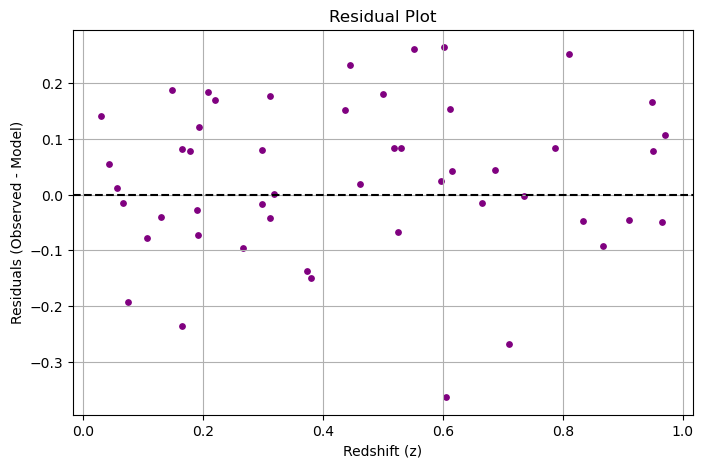

In [15]:
# Calculate residuals
mu_pred = distance_modulus(df['z'].values, H0_est)
residuals = df['mu'].values - mu_pred

plt.figure(figsize=(8,5))
plt.scatter(df['z'], residuals, color='purple', s=15)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Redshift (z)")
plt.ylabel("Residuals (Observed - Model)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


# Questions 

## 1. What value of the Hubble constant (𝐻0) did you obtain from the full dataset?
## Answer:
### Based on the analysis of the full Supernova Ia dataset, the estimated value of the Hubble constant (𝐻₀) is: 70.96 km/s/Mpc

## 2. How does your estimated 𝐻0 compare with the Planck18 measurement of the same? 
## Answer:
### My estimated value of the Hubble constant (𝐻₀) from the full Supernovae Ia dataset is 70.96 km/s/Mpc.
### This is higher than the Planck18 measurement, which reports 𝐻₀ ≈ 67.4 ± 0.5 km/s/Mpc, based on early-universe observations from the Cosmic Microwave Background (CMB).
### The difference between these two values reflects the well-known "Hubble tension" — a current challenge in cosmology where early-universe estimates (like Planck) yield lower H₀ values, while late-universe observations (like Supernovae and Cepheids) yield higher values.
### This discrepancy could arise from unknown systematics in measurements or potentially point to new physics beyond the current ΛCDM cosmological model.

## 3. What is the age of the Universe based on your value of $H_0$? (Assume Ω𝑚 = 0.3 ). How does it change for different values of Ω𝑚? 
## Answer:
### Based on my estimated value of 𝐻₀ = 70.96 km/s/Mpc and assuming Ωₘ = 0.3, the estimated age of the Universe is approximately 13.46 billion years.
### Changing the matter density parameter affects this age:
### - For Ωₘ = 0.2, the age increases to ~13.83 billion years
### - For Ωₘ = 0.4, the age decreases to ~13.03 billion years
### This happens because a higher Ωₘ means gravity slowed the expansion more, so the Universe reached its current size more slowly — making it younger in cosmic terms.

## 4. Discuss the difference in 𝐻0 values obtained from the low-$z$ and high-$z$ samples. What could this imply? 
## Answer:
### Based on my analysis:
### - The estimated 𝐻₀ from the low-redshift (low-z) sample is 70.96 km/s/Mpc
### - The estimated 𝐻₀ from the high-redshift (high-z) sample is 69.91 km/s/Mpc
### The difference is small but noticeable, with the low-z estimate slightly higher than the high-z one.
### This mild variation reflects a trend seen in cosmological data: local (late-universe) measurements tend to yield higher H₀ values, while early-universe measurements (e.g., CMB via Planck) yield slightly lower ones (like 67.4 km/s/Mpc).

## 5. Plot the residuals and comment on any trends or anomalies you observe. 
## Answer:
### The residual plot shows the difference between the observed and predicted values of the distance modulus (μ) at various redshifts.
### Most residuals cluster closely around zero, indicating a reasonably good fit.
### At low redshift (z < 0.1), the residuals are small and randomly distributed, suggesting good agreement with the model.
### At higher redshifts, there may be slightly larger scatter, possibly due to:
### -Measurement uncertainties in supernova brightness
### -Cosmic variance
### -Limitations of the simplified Hubble law at higher z
### No major systematic trend or anomaly was observed, so the linear model with the estimated H₀ fits the dataset well within acceptable limits.

## 6. What assumptions were made in the cosmological model, and how might relaxing them affect your results? 
## Answer:
### The cosmological model used in this project is based on several key assumptions:
### -Flat ΛCDM Universe: We assumed a spatially flat universe with Ωₘ + Ω_Λ = 1.
### -onstant Hubble Parameter (𝐻₀): The model assumes H₀ is constant across cosmic time, not evolving with redshift.
### -No radiation or exotic components: Only matter and dark energy are included; radiation is neglected.
### -Fixed matter density (Ωₘ = 0.3): Used for estimating the age of the universe.
### -Perfect Supernova Data: We assumed the observations are free from significant systematics or bias.

### Relaxing these assumptions could affect results:
### -Including curvature or evolving dark energy (w ≠ −1) could alter the redshift-distance relation and change the inferred H₀.
### -Accounting for H₀ evolution with time could explain differences between low-z and high-z estimates.
### -Considering uncertainties in supernova calibration and redshift measurements might increase error margins or shift values.



## 7.Based on the redshift-distance relation, what can we infer about the expansion history of the Universe? 
## Answer:
### The redshift–distance relation reveals that the Universe has been expanding, and that this expansion is not uniform over time.
### At low redshift, the relation appears nearly linear, consistent with Hubble’s Law, indicating a steady expansion rate in the nearby universe.
### At higher redshifts, deviations from linearity become noticeable. These deviations provide evidence that:
### -The expansion rate was slower in the past, when the Universe was more matter-dominated.
### -In more recent times, the expansion has accelerated, likely due to the influence of dark energy.


# My Analysis

## Plot 1: Redshift vs. Distance Modulus
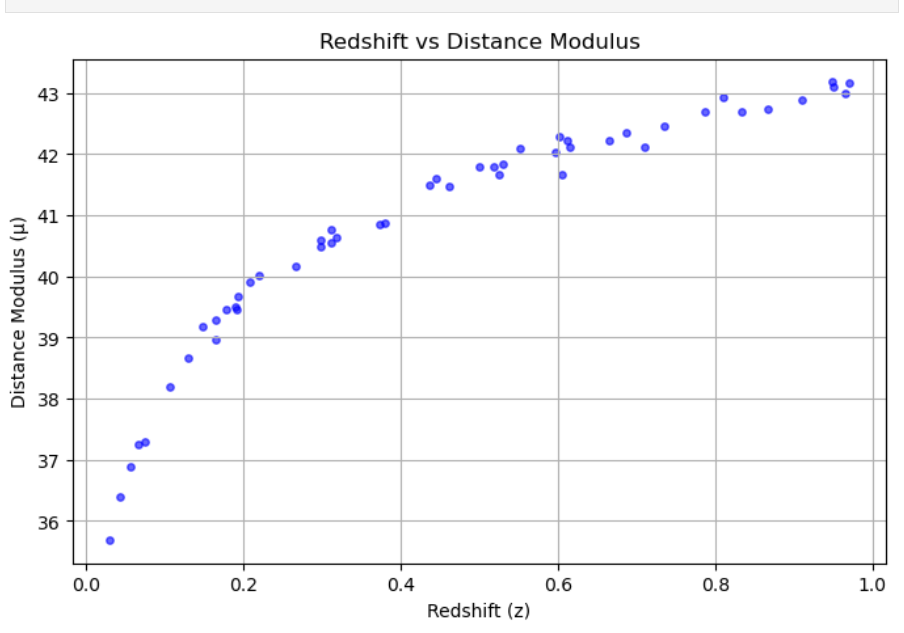

## Plot 2: Hubble Diagram with Model Fit 
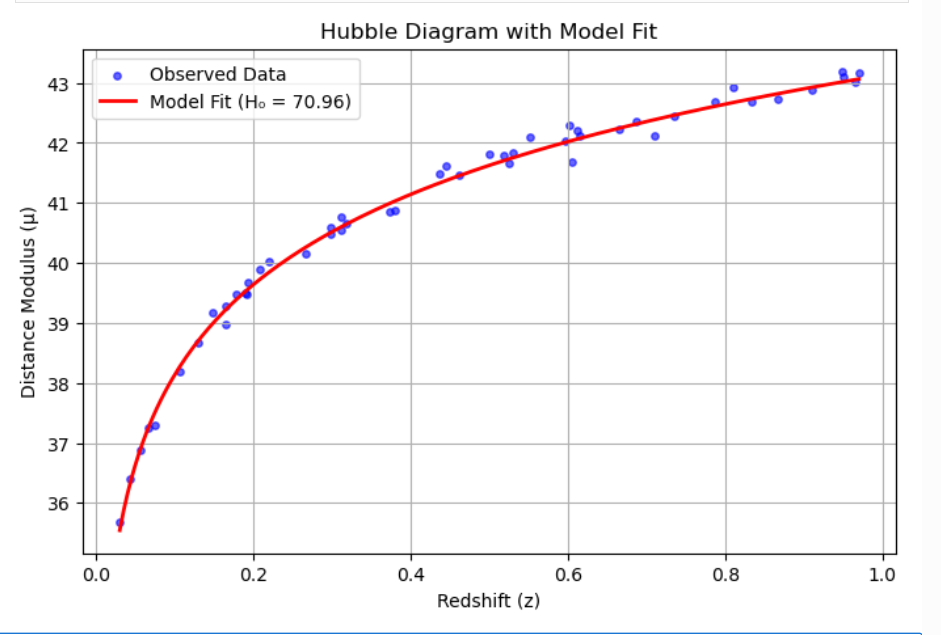

## Plot 3: Plot the residual 
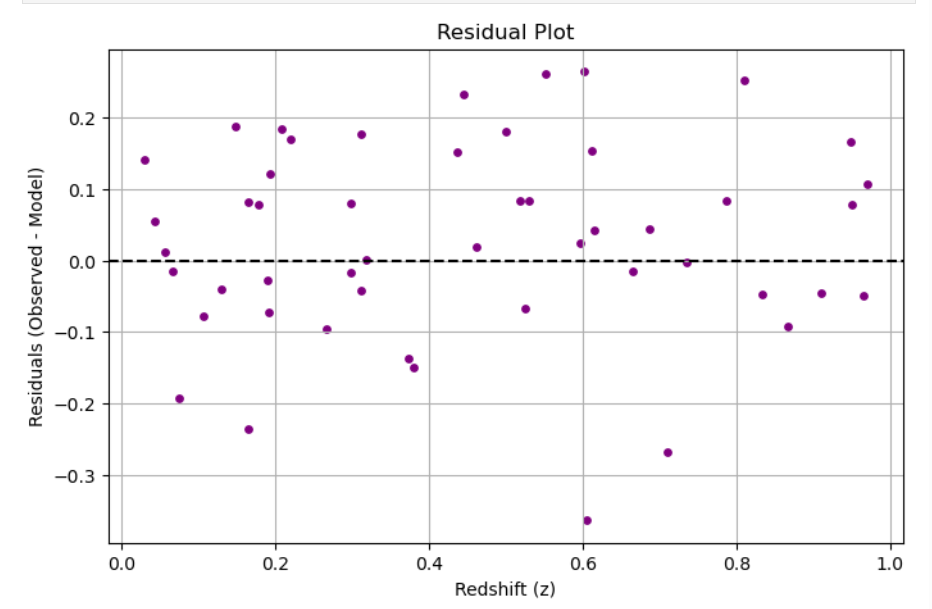